# Data insights
We are analysing the Level 3 data from the LINCS dataset.

This notebook will simply give some insight into the data for later analysis.

The comparisson to other representations can be found in the pretrained folder for example.

In [89]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cytominer_eval import evaluate
from pycytominer.cyto_utils import infer_cp_features
from cytominer_eval.transform import metric_melt
from sklearn.decomposition import PCA
import seaborn as sns

In [104]:
# import level 3 data
df = pd.read_csv('../01_data/level3_featselected_500_nadropped.csv')

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (8,9,16,17,18,20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [105]:
features = infer_cp_features(df)

In [106]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features].values)
df['pca_one'] = pca_result[:,0]
df['pca_two'] = pca_result[:,1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.8322637  0.08849717]


In [107]:
df = df.sample(frac = 1)

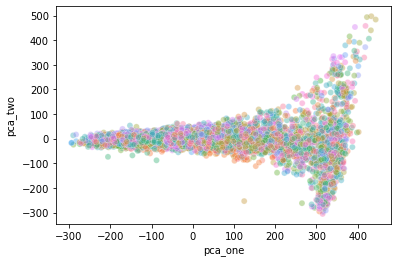

In [108]:
plt.style.use({'figure.facecolor':'white'})
gfg = sns.scatterplot(data=df, x="pca_one", y='pca_two', hue='Metadata_Plate', alpha=0.4)
gfg.legend_.remove()

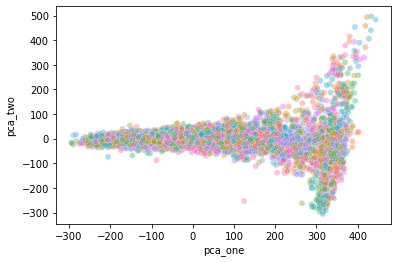

In [109]:
plt.style.use({'figure.facecolor':'white'})
gfg = sns.scatterplot(data=df, x="pca_one", y='pca_two', hue='Metadata_Well', alpha=0.4)
gfg.legend_.remove()

In [115]:
dmso = df.query("Metadata_broad_sample == 'DMSO'")
def is_dmso(sample):
    if sample == 'DMSO':
        return 'DMSO'
    else:
        return 'Compound'
df['DMSO'] = df.Metadata_broad_sample.apply(is_dmso)

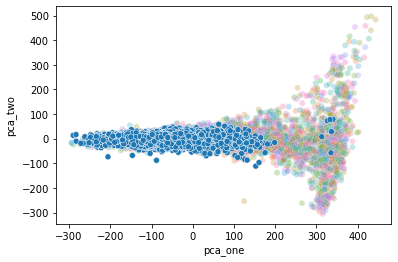

In [118]:
gfg = sns.scatterplot(data=df, x="pca_one", y='pca_two', hue='Metadata_Plate', sizes=3, alpha=0.3)
gfg = sns.scatterplot(data=dmso, x="pca_one", y='pca_two', hue='DMSO', sizes=3, alpha=1)
plt.style.use({'figure.facecolor':'white'})
gfg.legend_.remove()

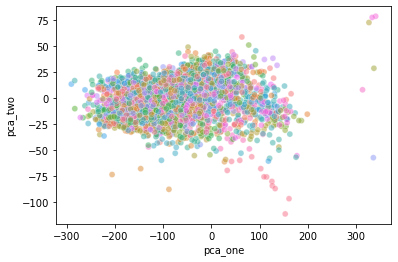

In [119]:
gfg = sns.scatterplot(data=dmso, x="pca_one", y='pca_two', hue='Metadata_Plate', sizes=3, alpha=0.5)
plt.style.use({'figure.facecolor':'white'})
gfg.legend_.remove()

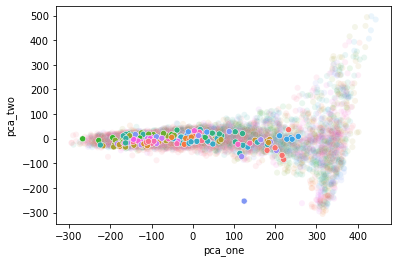

In [120]:
moa_df = df.query("Metadata_moa == 'phosphodiesterase inhibitor'")
gfg = sns.scatterplot(data=df, x="pca_one", y='pca_two', hue='Metadata_broad_sample', sizes=3, alpha=0.1)
gfg = sns.scatterplot(data=moa_df, x="pca_one", y='pca_two', hue='Metadata_broad_sample', sizes=3)
plt.setp(gfg.get_legend().get_texts(), fontsize='5')
plt.style.use({'figure.facecolor':'white'})
gfg.legend_.remove()

In [ ]:
#The shape of the PCA is fully determined by the amount of feature selection done!

In [130]:
df = pd.read_csv('../01_data/sub_level3.csv')

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (8,9,16,17,18,20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [131]:
features = infer_cp_features(df)
def drop_feats(df_old, features_old, threshold):
    drop_features = []
    for feat in features_old:
        if (np.abs(df_old[feat]) > threshold).any():
            drop_features.append(feat)
    df_out = df.drop(drop_features,  axis = "columns")
    print("dropped {} features".format(len(drop_features)))
    return df_out, drop_features
df = df.dropna(axis='columns')
features = infer_cp_features(df)

In [132]:
df_500, dropped_feats = drop_feats(df, features, 500)
df_100, dropped_feats = drop_feats(df, features, 100)
df_20, dropped_feats = drop_feats(df, features, 20)

dropped 95 features
dropped 124 features
dropped 190 features


In [133]:
df = df.sample(frac = 1)
pca = PCA(n_components=2)
features_500 = infer_cp_features(df_500)
pca_result = pca.fit_transform(df_500[features_500].values)
df_500['pca_one'] = pca_result[:,0]
df_500['pca_two'] = pca_result[:,1]
features_100 = infer_cp_features(df_100)
pca_result = pca.fit_transform(df_100[features_100].values)
df_100['pca_one'] = pca_result[:,0]
df_100['pca_two'] = pca_result[:,1]
features_20 = infer_cp_features(df_20)
pca_result = pca.fit_transform(df_20[features_20].values)
df_20['pca_one'] = pca_result[:,0]
df_20['pca_two'] = pca_result[:,1]

In [134]:
def is_dmso(sample):
    if sample == 'DMSO':
        return 'DMSO'
    else:
        return 'Compound'
df_500['DMSO'] = df_500.Metadata_broad_sample.apply(is_dmso)
df_100['DMSO'] = df_100.Metadata_broad_sample.apply(is_dmso)
df_20['DMSO'] = df_20.Metadata_broad_sample.apply(is_dmso)

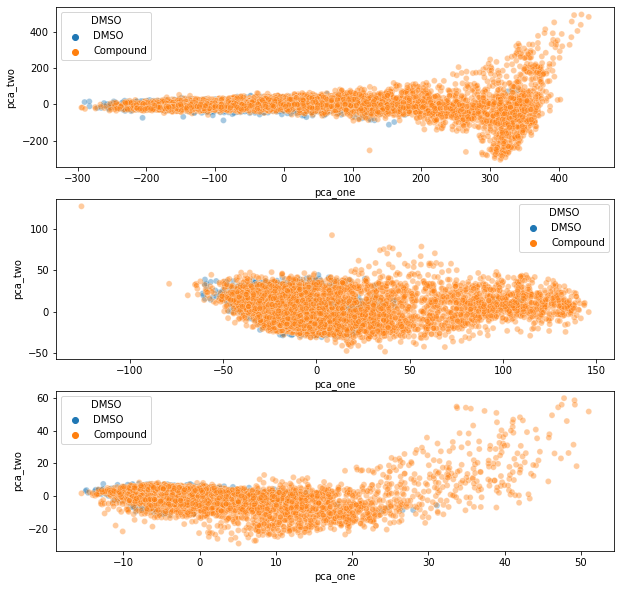

In [135]:
fig, ax =plt.subplots(3,1, figsize=(10,10))
plt.style.use({'figure.facecolor':'white'})
gfg1 = sns.scatterplot(data=df_500, x="pca_one", y='pca_two', hue='DMSO', alpha=0.4, ax=ax[0])
gfg2 = sns.scatterplot(data=df_100, x="pca_one", y='pca_two', hue='DMSO', alpha=0.4, ax=ax[1])
gfg3 = sns.scatterplot(data=df_20, x="pca_one", y='pca_two', hue='DMSO', alpha=0.4, ax=ax[2])

,Unnamed: 0,Metadata_plate_map_name,Metadata_broad_sample,Metadata_mg_per_ml,Metadata_mmoles_per_liter,Metadata_solvent,Metadata_Plate,Metadata_Well,Metadata_pert_id,Metadata_pert_mfc_id,...,Nuclei_Texture_Variance_Mito_20_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_20_0,Nuclei_Texture_Variance_RNA_5_0,broad_sample,Metadata_moa,pca_one,pca_two,DMSO


In [136]:
(df_20.Metadata_broad_sample == 'DMSO').sum()

3264